# ¡Hola Monica! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Monica completaste todas las tareas propuestas para el proyecto de manera sobresaliente. Demostraste un excelente manejo de las herramientas de manipulación y visualización de datos.

Como sugerencia para fortalecer aún más tu análisis estadístico, sería conveniente incorporar la prueba de Levene antes de realizar comparaciones de medias, ya que esto asegurará que tus resultados sean más robustos y confiables.

Continúa desarrollando estas habilidades, ya que serán claves en futuros proyectos.

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

## SPRINT 8 - PROYECTO "Viajes en Taxi"

1. Introducción 

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

Parte IV. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

INICIALIZACIÓN 

In [1]:
# Se cargan todas las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
# Se cargan los archivos de datos en dierentes DataFrames
company_df = pd.read_csv('/datasets/project_sql_result_01.csv', ',')
trips_df = pd.read_csv('/datasets/project_sql_result_04.csv', ',')
trips_airport_df = pd.read_csv('/datasets/project_sql_result_07.csv', ',')

In [3]:
# Se imprime la informacion general/resumida sobre el DataFrame de las compañias de taxis
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Se imprime una muestra de los datos de las compañias de Taxis 
company_df.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
# Se imprime la informacion general/resumida sobre el DataFrame de los viajes de las compañias de taxis 
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
# Se imprime una muestra de los datos de los viajes de las compáñias de taxis 
trips_df.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [7]:
# Se imprime la informacion general/resumida sobre el DataFrame de los viajes de las compañias de taxis desde el Loop hasta Aeropuerto Internacional O'Hare 
trips_airport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [8]:
# Se imprime una muestra de los datos de los viajes de las compáñias de taxis desde el Loop hasta Aeropuerto Internacional O'Hare 
trips_airport_df.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

</div>

PREPARAR LOS DATOS 

In [9]:
# Confirmamos que los datos sean correctos 
print(company_df.dtypes)
print(trips_df.dtypes)
print(trips_airport_df.dtypes)

company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [10]:
# Correción necesaria: convertir start_ts a datetime
trips_airport_df['start_ts'] = pd.to_datetime(trips_airport_df['start_ts'])
print(trips_airport_df.dtypes)

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


In [11]:
# Confirmamos si hay datos nulos 
print(company_df.isnull().sum())
print(trips_df.isnull().sum())
print(trips_airport_df.isnull().sum())

company_name    0
trips_amount    0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


ANALISIS DE LOS DATOS 

In [12]:
# Top 10 de barrios con mayor promedio de viajes terminados
top_dropoff = trips_df.sort_values(by='average_trips', ascending=False).head(10)
print(top_dropoff)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


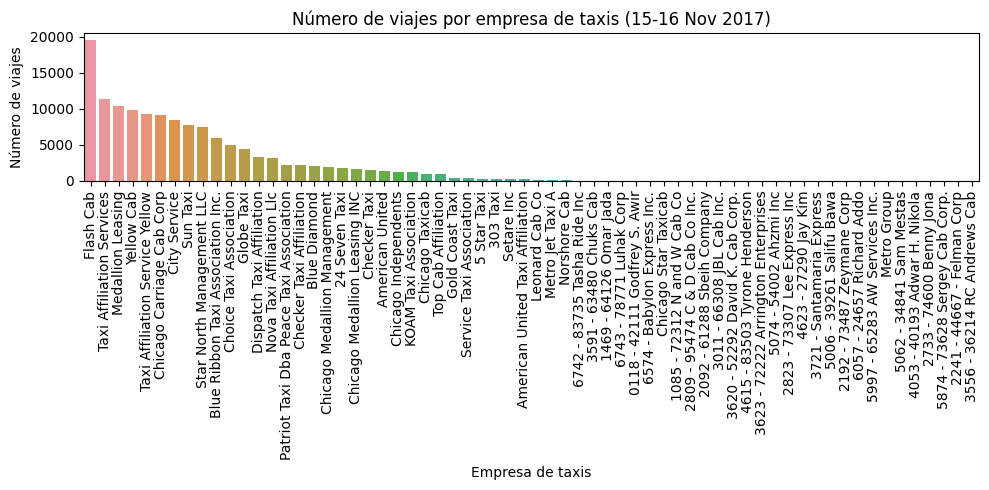

In [13]:
# Gráfico: número de viajes por empresa de taxis
plt.figure(figsize=(10,5))
sns.barplot(
    data=company_df.sort_values('trips_amount', ascending=False),
    x='company_name',
    y='trips_amount'
)
plt.xticks(rotation=90)
plt.title('Número de viajes por empresa de taxis (15-16 Nov 2017)')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()

El gráfico muestra cuáles son las empresas con mayor cantidad de viajes registrados el 15 y 16 de noviembre de 2017, la empresa "Flash Cab" lidera con casi 20,000 viajes hechos solo en 48 horas. La empresa "Taxi Affiliation Services" ocupa el segundo lugar. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo con la gráfica! Se ve claramente que Flash Cab lidera en volumen de viajes, lo que sugiere una fuerte concentración del mercado. Esto puede estar relacionado con su cobertura, cantidad de vehículos o buenas estrategias comerciales.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como recomendación, puedes configurar la gráfica para solo mostrar el Top 10 de empresas, ya que si te das cuenta más de la mitad de empresas tienen muy pocos datos. Esto le dará claridad a la información y facilitará su interpretación.

</div>
</div>

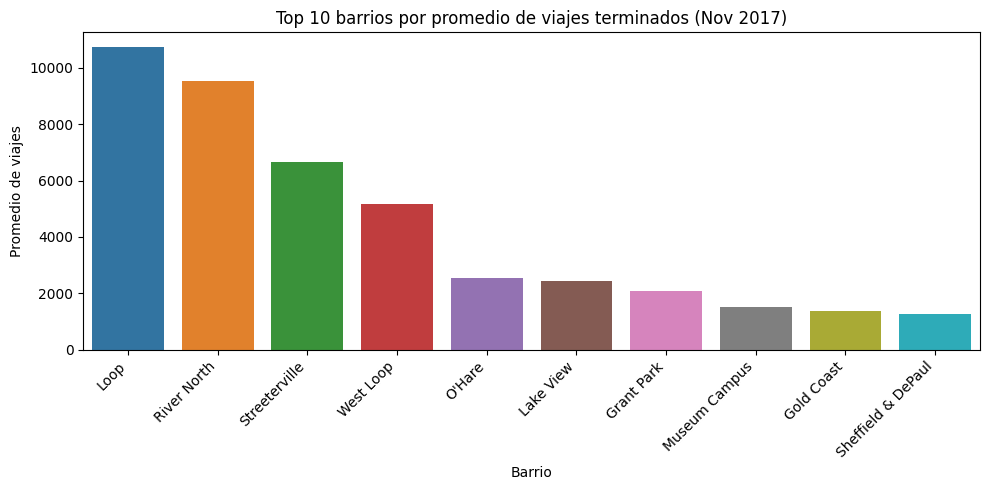

In [14]:
# Gráfico: Top 10 de barrios principales por número de finalizaciones 
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_dropoff, 
    x='dropoff_location_name',
    y='average_trips'
)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 barrios por promedio de viajes terminados (Nov 2017)')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.tight_layout()
plt.show()

En el gráfico anterior podemos observar los barrios en los más se realizaron viajes finales, en esto no se consiseraron las empresas de taxi aunque podriamos hacerlo. El barrio de Loop es a donde la mayoria de los taxis realizan sus viajes finales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo obteniendo el Top de barrios! Lograste identificar y jerarquizar bien los de mayor actividad, destacando la diferencia notable con barrios como Loop y River North, que seguramente destacan por su relevancia comercial y turística.

</div>

PRUEBA DE HIPOTESIS

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [15]:
α = 0.05
# Aceptamos un 5% de probabilidad de rechazar la hipótesis nula cuando en realidad es cierta

Vamos a comparar duraciones de viaje según las condiciones del clima (Good vs Bad) los sabados

Queremos saber si la duración promedio de los viajes desde Loop hasta el Aeropuerto O'Hare cambia dependiendo del clíma los días sábados

Hipótesis nula: La duración promedio de los viajes los días sábados desde Loop a O'Hare es igual en clima bueno y malo

Hipótesis alternativa: La duración promedio es diferente según el clima 

In [16]:
# Confirmamos de que la columna start_ts esté en formato datetime
trips_airport_df['start_ts'] = pd.to_datetime(trips_airport_df['start_ts'])

# Filtramos solo los sábados
saturday_df = trips_airport_df[trips_airport_df['start_ts'].dt.dayofweek == 5]

# Separaramos los viajes por clima
good_weather = saturday_df[saturday_df['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = saturday_df[saturday_df['weather_conditions'] == 'Bad']['duration_seconds']

# Verificamos el tamaño de las muestras
print(f"Viajes con clima bueno: {len(good_weather)}")
print(f"Viajes con clima malo: {len(bad_weather)}")

# Aplicamos la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(good_weather, bad_weather, equal_var=False)

print(f"\nEstadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio de los viajes en sábados con mal clima es diferente.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa en la duración promedio.")

Viajes con clima bueno: 888
Viajes con clima malo: 180

Estadístico t: -7.1860
Valor p: 0.0000
Rechazamos la hipótesis nula: la duración promedio de los viajes en sábados con mal clima es diferente.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Monica aplicaste correctamente la prueba de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula, logrando comprobar que el clima sí afecta la duración de los viajes en Taxi

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la *prueba t* sea estadísticamente válida.

</div>
</div>